# 点電荷モデルによる静電ポテンシャル、電場、電場勾配  

（初版：2020年3月、更新：2023年2月21日）  

## 静電ポテンシャルと電場  

原点に配置した電荷 $Q$ による静電ポテンシャル $V$ は  


$$\displaystyle{V = \frac{Q}{\sqrt{x^2 + y^2 + z^2}}}$$ 

と書ける（$4\pi\varepsilon_0 \to 1$とする）。電場 $\vec{E}$ は $\vec{E} = -\nabla V$ から  

$$\begin{align*}
\vec{E} &= \left( \frac{Q x}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}},
\frac{Q y}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}},
\frac{Q z}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}} \right)\\
   &= \frac{Q}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}}\left(x, y, z \right)
\end{align*}$$


となる。  
これをJuliaで書いてみる。  
数式処理にSymPyを使う。

In [1]:
using Plots
using SymPy
using LinearAlgebra

In [2]:
@vars x y z Q;

静電ポテンシャルと電場の式：SymPy

In [3]:
Vsym(x,y,z,Q) = Q/sqrt(x^2+y^2+z^2)
Esym(x,y,z,Q) = -1 .* [diff(Vsym(x,y,z,Q),x), diff(Vsym(x,y,z,Q),y), diff(Vsym(x,y,z,Q),z)]

Esym (generic function with 1 method)

電荷の位置は原点、位置 $(x, y, z)$でのポテンシャルと電場が正しく表示されるか確認。

In [4]:
Vsym(x,y,z,Q)

        Q        
-----------------
   ______________
  /  2    2    2 
\/  x  + y  + z  

In [5]:
Esym(x,y,z,Q)

3-element Vector{Sym}:
 Q*x/(x^2 + y^2 + z^2)^(3/2)
 Q*y/(x^2 + y^2 + z^2)^(3/2)
 Q*z/(x^2 + y^2 + z^2)^(3/2)

電場の数値計算用の関数を作成

In [6]:
Ecal = lambdify(Esym(x,y,z,Q), [x,y,z,Q])

#122 (generic function with 1 method)

位置 $(-1, 0, 0)$ での電場を計算してみる（ $Q = 1$ ）。

In [7]:
Ecal(-1,0,0,1)

3-element Vector{Float64}:
 -1.0
  0.0
  0.0

### 1つの点電荷による電場の様子を図示

z = 0


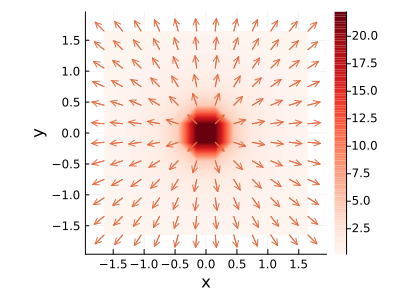

In [8]:
x1 = 0; y1 = 0; z1 = 0; # 電荷の座標
Q1 = 1; # 電荷の大きさ
zc = 0; # 計算する位置のz座標
num = 5;
div = 0.3;

xs = -div*(num+0.5) : div : div*(num+0.5) # x座標
ys = -div*(num+0.5) : div : div*(num+0.5) # y座標
xxs = [x for x in xs for y in ys]
yys = [y for x in xs for y in ys]

println("z = ", z1)
EvecNormalize(x, y) = normalize(Ecal(x-x1, y-y1, zc-z1, Q1)) ./ 5
A = [norm(Ecal(x-x1, y-y1, zc-z1, Q1)) for x in xs, y in ys]'

contour(xs, ys, A, color=:Reds, fill=true, line=false, levs=100, aspect_ratio=:equal,
        size=(400,300), xlabel="x", ylabel="y",xlims=[xs[begin]-div,xs[end]+div])
quiver!(xxs, yys, quiver=EvecNormalize)

### 2つの点電荷による電場の様子を図示

z = 0


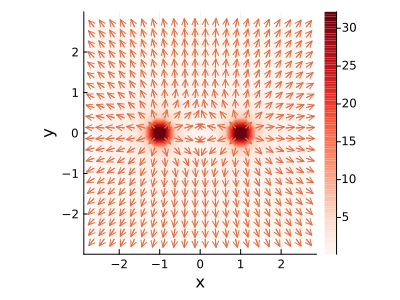

In [9]:
x1 =   1; y1 = 0; Q1 = 1; #電荷1の座標と大きさ
x2 =  -1; y2 = 0; Q2 = 1; #電荷1の座標と大きさ
zc = 0; # 計算する位置のz座標
num = 10;
div = 0.25;

xs = -div*(num+0.5) : div : div*(num+0.5)
ys = -div*(num+0.5) : div : div*(num+0.5)
xxs = [x for x in xs for y in ys]
yys = [y for x in xs for y in ys]

println("z = ", zc)
EvecNormalize(x, y) = normalize(Ecal(x-x1, y-y1, zc-z1, Q1) + Ecal(x-x2, y-y2, zc-z1, Q2)) ./ 5
A = [norm(Ecal(x-x1, y-y1, zc-z1, 1) + Ecal(x-x2, y-y2, zc-z1, 1)) for x in xs, y in ys]'

contour(xs, ys, A, color=:Reds, fill=true, line=false, levs=100, aspect_ratio=:equal,
        size=(400,300), xlabel="x", ylabel="y",xlims=[xs[begin]-div,xs[end]+div])
quiver!(xxs, yys, quiver=EvecNormalize)

## 電場勾配を求める  

電場勾配は静電ポテンシャルの位置による2回微分で、以下のように書ける。  

$$\begin{align*}
V_{\alpha, \beta} = \frac{\partial^2 V}{\partial\alpha\partial\beta} &=
\left[ \begin{array}{ccc}\frac{Q \left(2 x^{2} - y^{2} - z^{2}\right)}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{3 Q x y}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{3 Q x z}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}\\\frac{3 Q x y}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{Q \left(- x^{2} + 2 y^{2} - z^{2}\right)}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{3 Q y z}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}\\\frac{3 Q x z}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{3 Q y z}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}&\frac{Q \left(- x^{2} - y^{2} + 2 z^{2}\right)}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}\end{array}\right]\\
&= 
\frac{Q}{\left(x^{2} + y^{2} + z^{2}\right)^{\frac{5}{2}}}
\left[ \begin{array}{ccc}
2x^{2}-y^{2}-z^{2}&3xy&3xz\\
3xy&-x^{2}+2y^{2}-z^{2}&3yz\\
3xz&3yz&-x^{2}-y^{2}+2z^{2}
\end{array}\right]
\end{align*}$$

これをJuliaで書いてみる。  
数式処理にSymPyを使う。

電場勾配（テンソル成分）の式：SymPy

In [10]:
V2difsym(a, b) = simplify(diff(Vsym(x,y,z,Q), a, b))

V2difsym (generic function with 1 method)

$\displaystyle{V_{x,x}}$ と $\displaystyle{V_{x,y}}$ を計算して、正しいか確認する。

In [11]:
Vxx = V2difsym(x, x)

  /   2    2    2\
Q*\2*x  - y  - z /
------------------
              5/2 
/ 2    2    2\    
\x  + y  + z /    

In [12]:
Vxy = V2difsym(x, y)

     3*Q*x*y     
-----------------
              5/2
/ 2    2    2\   
\x  + y  + z /   

電場勾配テンソル：SymPy

In [13]:
V2difmatsym = [V2difsym(x,x) V2difsym(y, x) V2difsym(z, x)
               V2difsym(x,y) V2difsym(y, y) V2difsym(z, y)
               V2difsym(x,z) V2difsym(y, z) V2difsym(z, z)
               ]

3×3 Matrix{Sym}:
 Q*(2*x^2 - y^2 - z^2)/(x^2 + y^2 + z^2)^(5/2)  …                 3*Q*x*z/(x^2 + y^2 + z^2)^(5/2)
               3*Q*x*y/(x^2 + y^2 + z^2)^(5/2)                    3*Q*y*z/(x^2 + y^2 + z^2)^(5/2)
               3*Q*x*z/(x^2 + y^2 + z^2)^(5/2)     Q*(-x^2 - y^2 + 2*z^2)/(x^2 + y^2 + z^2)^(5/2)

### 正8面体の頂点に電荷が配置されているときの原点位置での電場勾配：SymPy

In [14]:
@vars a1
simplify(V2difmatsym.subs(x, 0-a1).subs(y, 0).subs(z, 0) + V2difmatsym.subs(x, 0+a1).subs(y, 0).subs(z, 0) + 
         V2difmatsym.subs(y, 0-a1).subs(z, 0).subs(x, 0) + V2difmatsym.subs(y, 0+a1).subs(z, 0).subs(x, 0) +
         V2difmatsym.subs(z, 0-a1).subs(x, 0).subs(y, 0) + V2difmatsym.subs(z, 0+a1).subs(x, 0).subs(y, 0)
)

3×3 Matrix{Sym}:
 0  0  0
 0  0  0
 0  0  0

電場勾配はない。

### xy平面上に4回対称に電荷が配置されているときの原点位置での電場勾配：SymPy

In [15]:
@vars a2
simplify(V2difmatsym.subs(x, 0-a2).subs(y, 0).subs(z, 0) + V2difmatsym.subs(x, 0+a2).subs(y, 0).subs(z, 0) + 
         V2difmatsym.subs(y, 0-a2).subs(z, 0).subs(x, 0) + V2difmatsym.subs(y, 0+a2).subs(z, 0).subs(x, 0)
)

3×3 Matrix{Sym}:
 2*Q*a2^2/(a2^2)^(5/2)                      0                       0
                     0  2*Q*a2^2/(a2^2)^(5/2)                       0
                     0                      0  -4*Q*a2^2/(a2^2)^(5/2)

$\displaystyle{|V_{z,z}| > |V_{x,x}| = |V_{y,y}|}$ であることから、
$z$軸が電場勾配の最大主軸で、軸対称の異方性を有する（非対称パラメータ $\eta = 0$ ）。

### xy平面上に2回対称に電荷が配置されているときの原点位置での電場勾配：SymPy

In [16]:
@vars a2
simplify(V2difmatsym.subs(x, 0-a2/2).subs(y, 0).subs(z, 0) + V2difmatsym.subs(x, 0+a2/2).subs(y, 0).subs(z, 0) + 
         V2difmatsym.subs(y, 0-a2).subs(z, 0).subs(x, 0) + V2difmatsym.subs(y, 0+a2).subs(z, 0).subs(x, 0)
)

3×3 Matrix{Sym}:
 30*Q*a2^2/(a2^2)^(5/2)                        0                        0
                      0  -12*Q*a2^2/(a2^2)^(5/2)                        0
                      0                        0  -18*Q*a2^2/(a2^2)^(5/2)

$\displaystyle{|V_{x,x}| > |V_{z,z}| > |V_{y,y}|}$ であることから、
$x$軸が電場勾配の最大主軸で、非対称パラメータは $\displaystyle{\eta = \frac{1}{5}}$ となる。

### xy平面上に3回対称に電荷が配置されているときの原点位置での電場勾配：SymPy

In [17]:
@vars a3
simplify(V2difmatsym.subs(x, 0-a3/sympy.sqrt(3)).subs(y, 0).subs(z, 0) +
         V2difmatsym.subs(x, 0+a3/(2sympy.sqrt(3))).subs(y, -a3/2).subs(z, 0) + 
         V2difmatsym.subs(x, 0+a3/(2sympy.sqrt(3))).subs(y, +a3/2).subs(z, 0)
)

3×3 Matrix{Sym}:
 9*sqrt(3)*Q*a3^2/(2*(a3^2)^(5/2))  …                               0
                                 0                                  0
                                 0     -9*sqrt(3)*Q*a3^2/(a3^2)^(5/2)

$\displaystyle{|V_{z,z}| > |V_{x,x}| = |V_{y,y}|}$ であることから、
$z$軸が電場勾配の最大主軸で、軸対称の異方性を有する（非対称パラメータ $\eta = 0$ ）。

## 電場勾配を求める：数値計算

数値計算用の関数を作成

In [18]:
V2difmatcal = lambdify(V2difmatsym, [x,y,z,Q])
V2difmatcal2(calpoint, Qpoint, Qval) = V2difmatcal(calpoint[1]-Qpoint[1], calpoint[2]-Qpoint[2], calpoint[3]-Qpoint[3], Qval)

V2difmatcal2 (generic function with 1 method)

### 正8面体の頂点に電荷が配置されているときの原点位置での電場勾配

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

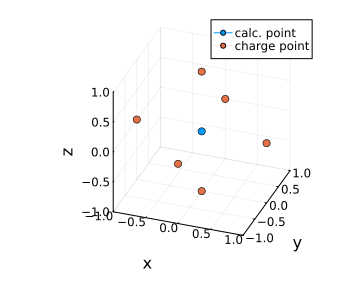

In [19]:
calpoint = [0,0,0]
Qpoint1 = [ 1  0  0
            0  1  0
           -1  0  0
            0 -1  0
            0  0  1
            0  0 -1];
Qval = 1
totalV2 = zeros(3,3)
for iii in eachindex(Qpoint1[:,1])
    totalV2 += V2difmatcal2(calpoint, Qpoint1[iii,:], Qval)
end
display(totalV2)

plot([calpoint[1]], [calpoint[2]], [calpoint[3]], marker=:circle, label="calc. point")
plot!(Qpoint1[:,1], Qpoint1[:,2], Qpoint1[:,3],
    xlims=[-1,1], ylims=[-1,1], zlims=[-1,1],
    xlabel="x", ylabel="y", zlabel="z", label="charge point",
    marker=:circle, line=:false, camera=(20,30), aspect_ratio=:equal, size=(350,300))

### xy平面上に4回対称に電荷が配置されているときの原点位置での電場勾配

3×3 Matrix{Float64}:
 2.0  0.0   0.0
 0.0  2.0   0.0
 0.0  0.0  -4.0

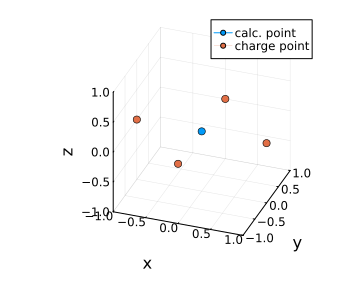

In [20]:
calpoint = [0,0,0]
Qpoint1 = [ 1  0 0
            0  1 0
           -1  0 0
            0 -1 0];
Qval = 1
totalV2 = zeros(3,3)
for iii in eachindex(Qpoint1[:,1])
    totalV2 += V2difmatcal2(calpoint, Qpoint1[iii,:], Qval)
end
display(totalV2)

plot([calpoint[1]], [calpoint[2]], [calpoint[3]], marker=:circle, label="calc. point")
plot!(Qpoint1[:,1], Qpoint1[:,2], Qpoint1[:,3],
    xlims=[-1,1], ylims=[-1,1], zlims=[-1,1],
    xlabel="x", ylabel="y", zlabel="z", label="charge point",
    marker=:circle, line=:false, camera=(20,30), aspect_ratio=:equal, size=(350,300))

### xy平面上に2回対称に電荷が配置されているときの原点位置での電場勾配

3×3 Matrix{Float64}:
 30.0    0.0    0.0
  0.0  -12.0    0.0
  0.0    0.0  -18.0

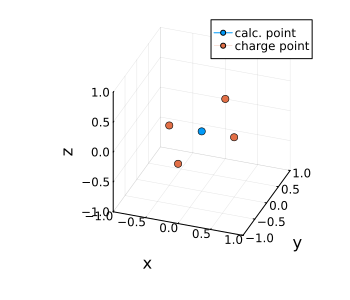

In [21]:
calpoint = [0,0,0]
Qpoint1 = [ 1/2  0 0
            0    1 0
           -1/2  0 0
            0   -1 0];
Qval = 1
totalV2 = zeros(3,3)
for iii in eachindex(Qpoint1[:,1])
    totalV2 += V2difmatcal2(calpoint, Qpoint1[iii,:], Qval)
end
display(totalV2)

plot([calpoint[1]], [calpoint[2]], [calpoint[3]], marker=:circle, label="calc. point")
plot!(Qpoint1[:,1], Qpoint1[:,2], Qpoint1[:,3],
    xlims=[-1,1], ylims=[-1,1], zlims=[-1,1],
    xlabel="x", ylabel="y", zlabel="z", label="charge point",
    marker=:circle, line=:false, camera=(20,30), aspect_ratio=:equal, size=(350,300))

### xy平面上に3回対称に電荷が配置されているときの原点位置での電場勾配

3×3 Matrix{Float64}:
 0.974279  0.0        0.0
 0.0       0.974279   0.0
 0.0       0.0       -1.94856

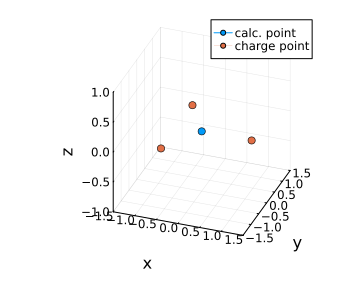

In [22]:
calpoint = [0,0,0]
Qpoint1 = [  2/sqrt(3)  0 0
            -1/sqrt(3)  1 0
            -1/sqrt(3) -1 0];
Qval = 1
totalV2 = zeros(3,3)
for iii in eachindex(Qpoint1[:,1])
    totalV2 += V2difmatcal2(calpoint, Qpoint1[iii,:], Qval)
end
display(totalV2)

plot([calpoint[1]], [calpoint[2]], [calpoint[3]], marker=:circle, label="calc. point")
plot!(Qpoint1[:,1], Qpoint1[:,2], Qpoint1[:,3],
    xlims=[-1.5,1.5], ylims=[-1.5,1.5], zlims=[-1,1],
    xlabel="x", ylabel="y", zlabel="z", label="charge point",
    marker=:circle, line=:false, camera=(20,30), aspect_ratio=:equal, size=(350,300))